## Deskripsi

Dataset berasal dari <a href="https://www.kaggle.com/datasets/new-york-city/nyc-property-sales">Kaggle</a>

#### Konteks

Kumpulan data ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti Kota New York selama periode 12 bulan.

Dataset ini berisi lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:
- <b>BOROUGH</b>: Kode digit untuk wilayah tempat properti berada; agar ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- <b>BLOCK</b>;<b>LOT</b>: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebu <b>BBL</b>
- <b>BUILDING CLASS AT PRESENT</b> dan <b>BUILDING CLASS AT TIME OF SALE</b>: Jenis bangunan di berbagai titik waktu. Lihat glosarium yang ditautkan ke bawah.

Untuk referensi lebih lanjut tentang masing-masing bidang, lihat <a href="https://www.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf">Glossary of Terms</a>. Untuk kode klasifikasi bangunan lihat <a href="https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html">Building Classifications Glossary.</a>

Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diperhatikan:
- Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling sering. Penjualan ini sebenarnya adalah pengalihan akta antar pihak: misalnya, orang tua mengalihkan kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
- Kumpulan data ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal satu entitas memiliki bangunan tersebut, penjualan mencakup nilai seluruh bangunan. Jika sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

# Import Library

In [587]:
# Import Library
import numpy as np
import pandas as pd
from scipy.stats import norm, t, describe
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [588]:
# Tambahkan mising value
mising_value = [' ', '-', ' -  ']

Pada langkah ini, kita perlu melakukan penambahan karakter atau nilai yang hilang karena terdapat karakter "NaN" yang menunjukkan adanya data kosong atau spasi yang tidak terdefinisi. Tindakan ini dilakukan untuk mengisi kekosongan tersebut agar data menjadi lebih lengkap dan dapat digunakan secara efektif.

In [589]:
# Load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/ardiy07/dataset/main/nyc-rolling-sales.csv', na_values= mising_value);

# copy dataset
df = df_ori.copy()

# Tampilkan 5 data teratas
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


Pada tahap ini, dilakukan pengambilan dataset dan penyimpanan ke dalam sebuah variabel. Tujuan dari melakukan penyalinan dataset ini adalah untuk menjaga keaslian dataset asli dan mencegah perubahan yang tidak diinginkan saat dilakukan pemrosesan data. Dengan menyimpan dataset dalam variabel terpisah, kita dapat bekerja dengan dataset salinan tanpa mengubah dataset asli, sehingga memastikan integritas dan konsistensi data yang kita gunakan.

In [590]:
# Tampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Dalam informasi yang diberikan, disebutkan bahwa terdapat data yang bernilai null dalam dataset tersebut. Selain itu, terdapat beberapa kolom yang memiliki tipe data int64 atau objek.

# Cleaning Data

In [591]:
# Drop column EASE-MENT dan Unnamed: 0
df.drop(columns=['EASE-MENT', 'Unnamed: 0'], inplace=True)

Penghapusan column EASE-MENT karena, data dari EASE-MENT merupakan Nan semua. sehingga column tersebut tidak bisa di gunakan.

In [592]:
# Ganti data Sale Price = 0 dengan NaN
df['SALE PRICE']= df['SALE PRICE'].replace(0, np.nan)
# Drop data Sale Price = 0
df.dropna()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
10520,1,ROOSEVELT ISLAND,11A CONDO-RENTALS,2,1373,2001,RR,480 MAIN STREET,LOWER,10044,52,0,52,23774.0,38428.0,2014,2,RR,23296741.0,2016-10-21 00:00:00
10694,1,SOHO,11A CONDO-RENTALS,2,230,1402,RR,25 MERCER STREET,UNIT2,10013,10,2,12,6185.0,15655.0,1880,2,RR,8146000.0,2017-08-15 00:00:00
17090,1,UPPER WEST SIDE (79-96),11A CONDO-RENTALS,2,1209,1101,RR,360 CENTRAL PARK WEST,RESID,10025,146,0,146,15100.0,155975.0,1929,2,RR,41000000.0,2017-06-22 00:00:00
18746,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,1,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28 00:00:00
18747,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,1,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59640,4,FLUSHING-SOUTH,07 RENTALS - WALKUP APARTMENTS,2A,6971,56,C3,164-18 77TH ROAD,42770,11366,4,0,4,2000.0,2400.0,1928,2,C3,965000.0,2017-07-31 00:00:00
73901,4,SPRINGFIELD GARDENS,07 RENTALS - WALKUP APARTMENTS,2A,12701,47,C3,122-20 NELLIS STREET,4,11413,4,0,4,1515.0,1984.0,1931,2,C3,308000.0,2017-05-10 00:00:00
82934,5,STAPLETON,02 TWO FAMILY DWELLINGS,1,505,100,S2,388 BAY STREET,10,10301,2,1,3,2313.0,2016.0,1953,1,S2,580000.0,2016-10-26 00:00:00
83790,5,WEST NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,178,46,B2,296 NORTH BURGHER AVENUE,94,10310,2,0,2,6867.0,4108.0,1910,1,B2,480000.0,2016-12-12 00:00:00


Penghapusan data dengan nilai 0 pada kolom Sale Price dilakukan karena ada beberapa rumah yang telah dialihkan ke keluarga atau tidak dijual. Oleh karena itu, dalam kolom Sale Price, nilai 0 digunakan untuk menandai bahwa rumah tersebut tidak termasuk dalam data penjualan. Penghapusan data dengan harga 0 memastikan bahwa hanya data penjualan yang valid dan relevan yang tetap ada dalam dataset, sehingga meminimalkan pengaruh data yang tidak relevan pada analisis yang dilakukan.

In [593]:
# Ambil rata - rata tahun rumah
mean_year_build = df['YEAR BUILT'].mean()

# Bulatkan rata - rata
mean_round = round(mean_year_build, 0)

# Ganti Year Built dengan = 0 dengan mean_round
df['YEAR BUILT'] = df['YEAR BUILT'].replace(0, mean_round)

### Handel data NaN

In [594]:
# handle data Nan
df.dropna(axis=0, inplace=True)

In [595]:
# Cek kembali data Nan
df.isna().any().sum()

0

Penanganan Nan dilakukan dengan menghapus baris yang berisi Nan, hal tersebut karena jumlah data Nan tidak terlalu banyak. Setelah di lakukan penanganan data Nan, data sudah tidak terdapat lagi data nan

### Handel data duplikat

In [596]:
# Cek data duplikat
df.duplicated().sum()

13

Pada data tersebut tidak terdapat data duplicat, sehingga tidak perlu di lakukan penanganan

# Memisahkan data angka dan object

### Data Angka

In [597]:
# Mengambil data dengan type float dan int
int_cols = df.select_dtypes(include = ['int64', 'float64']).columns

In [598]:
# Mengambil data dengan columns yang berisi angka
df_int = df[int_cols].copy()

In [599]:
# Tampilkan data
df_int.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
10520,1,1373,2001,10044,52,0,52,23774.0,38428.0,2014,2,23296741.0
10694,1,230,1402,10013,10,2,12,6185.0,15655.0,1880,2,8146000.0
17090,1,1209,1101,10025,146,0,146,15100.0,155975.0,1929,2,41000000.0
18746,2,4795,1009,10469,1,0,1,0.0,0.0,2008,1,310000.0
18747,2,4795,1027,10469,1,0,1,0.0,0.0,2008,1,342500.0


### Mengambil data object

In [600]:
# Mengambil data dengan type object
obj_cols = df.select_dtypes(include = ['object']).columns

In [601]:
# Mengambil data dengan columns yang berisi angka
df_obj = df[obj_cols].copy()

In [602]:
# Tampilkan data
df_obj.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT TIME OF SALE,SALE DATE
10520,ROOSEVELT ISLAND,11A CONDO-RENTALS,2,RR,480 MAIN STREET,LOWER,RR,2016-10-21 00:00:00
10694,SOHO,11A CONDO-RENTALS,2,RR,25 MERCER STREET,UNIT2,RR,2017-08-15 00:00:00
17090,UPPER WEST SIDE (79-96),11A CONDO-RENTALS,2,RR,360 CENTRAL PARK WEST,RESID,RR,2017-06-22 00:00:00
18746,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,R3,2877 ELY AVENUE,3,R3,2017-02-28 00:00:00
18747,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,R3,2853 ELY AVENUE,3,R3,2017-07-31 00:00:00


# Measure of Central Tendency: Mean

In [603]:
#  Lakukan looping nama columns dengan type data int
for i in int_cols:
  # Hitung niali mean dari masing - masing columns
  nilai_mean = df_int[i].mean()
  # Ttampilkan hitungan mean dari masing - masing columns
  print("Mean dari", i ,"=", nilai_mean)

Mean dari BOROUGH = 2.905226047283285
Mean dari BLOCK = 2953.831812525923
Mean dari LOT = 1224.2982165076733
Mean dari ZIP CODE = 11147.364164247201
Mean dari RESIDENTIAL UNITS = 1.656159270012443
Mean dari COMMERCIAL UNITS = 0.028204064703442555
Mean dari TOTAL UNITS = 1.7405640812940688
Mean dari LAND SQUARE FEET = 268.97055163832437
Mean dari GROSS SQUARE FEET = 729.0420987142264
Mean dari YEAR BUILT = 1940.0553712152634
Mean dari TAX CLASS AT TIME OF SALE = 2.0012442969722106
Mean dari SALE PRICE = 1202145.9773952716


# Measure of Central Tendency: Median

In [604]:
#  Lakukan looping nama columns dengan type data int
for i in int_cols:
  # Hitung niali mean dari masing - masing columns
  nilai_median = df_int[i].median()
  # Ttampilkan hitungan mean dari masing - masing columns
  print("Median dari", i ,"=", nilai_median)

Median dari BOROUGH = 3.0
Median dari BLOCK = 2237.5
Median dari LOT = 1104.0
Median dari ZIP CODE = 11217.0
Median dari RESIDENTIAL UNITS = 1.0
Median dari COMMERCIAL UNITS = 0.0
Median dari TOTAL UNITS = 1.0
Median dari LAND SQUARE FEET = 0.0
Median dari GROSS SQUARE FEET = 0.0
Median dari YEAR BUILT = 2003.0
Median dari TAX CLASS AT TIME OF SALE = 2.0
Median dari SALE PRICE = 795000.0


# Measure of Central Tendency: Modus

In [605]:
#  Lakukan looping nama columns dengan type data int
for i in int_cols:
  # Hitung niali modus dari masing - masing columns
  nilai_modus = df_int[i].mode()
  # Ttampilkan hitungan modus dari masing - masing columns
  print("Modus dari", i ,"=", nilai_modus)

Modus dari BOROUGH = 0    3
Name: BOROUGH, dtype: int64
Modus dari BLOCK = 0    2135
Name: BLOCK, dtype: int64
Modus dari LOT = 0    1001
Name: LOT, dtype: int64
Modus dari ZIP CODE = 0    11201
Name: ZIP CODE, dtype: int64
Modus dari RESIDENTIAL UNITS = 0    1
Name: RESIDENTIAL UNITS, dtype: int64
Modus dari COMMERCIAL UNITS = 0    0
Name: COMMERCIAL UNITS, dtype: int64
Modus dari TOTAL UNITS = 0    1
Name: TOTAL UNITS, dtype: int64
Modus dari LAND SQUARE FEET = 0    0.0
Name: LAND SQUARE FEET, dtype: float64
Modus dari GROSS SQUARE FEET = 0    0.0
Name: GROSS SQUARE FEET, dtype: float64
Modus dari YEAR BUILT = 0    1789
Name: YEAR BUILT, dtype: int64
Modus dari TAX CLASS AT TIME OF SALE = 0    2
Name: TAX CLASS AT TIME OF SALE, dtype: int64
Modus dari SALE PRICE = 0    10.0
Name: SALE PRICE, dtype: float64


In [606]:
#  Lakukan looping nama columns dengan type data int
for i in obj_cols:
  # Hitung niali modus dari masing - masing columns
  nilai_modus = df_obj[i].mode()
  # Ttampilkan hitungan modus dari masing - masing columns
  print("Modus dari", i ,"=", nilai_modus)

Modus dari NEIGHBORHOOD = 0    WILLIAMSBURG-SOUTH
Name: NEIGHBORHOOD, dtype: object
Modus dari BUILDING CLASS CATEGORY = 0    13 CONDOS - ELEVATOR APARTMENTS            
Name: BUILDING CLASS CATEGORY, dtype: object
Modus dari TAX CLASS AT PRESENT = 0    2
Name: TAX CLASS AT PRESENT, dtype: object
Modus dari BUILDING CLASS AT PRESENT = 0    R4
Name: BUILDING CLASS AT PRESENT, dtype: object
Modus dari ADDRESS = 0    429 KENT AVENUE
Name: ADDRESS, dtype: object
Modus dari APARTMENT NUMBER = 0    4
Name: APARTMENT NUMBER, dtype: object
Modus dari BUILDING CLASS AT TIME OF SALE = 0    R4
Name: BUILDING CLASS AT TIME OF SALE, dtype: object
Modus dari SALE DATE = 0    2017-04-13 00:00:00
Name: SALE DATE, dtype: object


# Measure of Spread: Range

In [607]:
#  Lakukan looping nama columns dengan type data int
for i in int_cols:
  # Hitung niali range dari masing - masing columns
  nilai_range = np.ptp(df_int[i])
  # Ttampilkan hitungan range dari masing - masing columns
  print("Range dari", i ,"=", nilai_range)

Range dari BOROUGH = 4
Range dari BLOCK = 12700
Range dari LOT = 5360
Range dari ZIP CODE = 1400
Range dari RESIDENTIAL UNITS = 146
Range dari COMMERCIAL UNITS = 10
Range dari TOTAL UNITS = 145
Range dari LAND SQUARE FEET = 32470.0
Range dari GROSS SQUARE FEET = 155975.0
Range dari YEAR BUILT = 227
Range dari TAX CLASS AT TIME OF SALE = 3
Range dari SALE PRICE = 154249999.0


# Measure of Spread: Variance

In [608]:
df_describe = describe(df_int, ddof=1, bias=False) #Ambil describe
df_describe.variance

array([9.24472731e-02, 6.12900288e+06, 4.26657535e+05, 5.11663693e+04,
       3.16328380e+01, 8.01004454e-02, 3.23502273e+01, 2.10338217e+06,
       3.17874631e+07, 8.22746364e+03, 3.57185757e-01, 1.06220120e+13])

In [609]:
for i in df_describe.variance:
  print(i) #Ambil describe dari masing - masing kolom

0.09244727309862293
6129002.881684289
426657.53477798414
51166.369327438675
31.632838014868415
0.08010044538484377
32.350227269383716
2103382.167562401
31787463.05962538
8227.463641544395
0.3571857569421628
10622012015468.625


# Measure of Spread: Standard Deviation

In [610]:
df_describes = df_int.describe() #Tampilkan describe dari data

In [611]:
for i in df_describes:
  std = df_describes[i]['std'] #Ambil std dari masing - masing kolom
  print('Standard Deviation dari', i, '=', std) #Tampilkan describe dari masing - masing kolom

Standard Deviation dari BOROUGH = 0.30405143166678716
Standard Deviation dari BLOCK = 2475.682306291397
Standard Deviation dari LOT = 653.1902745586343
Standard Deviation dari ZIP CODE = 226.199843782967
Standard Deviation dari RESIDENTIAL UNITS = 5.624307780951218
Standard Deviation dari COMMERCIAL UNITS = 0.283020220805588
Standard Deviation dari TOTAL UNITS = 5.687726019191125
Standard Deviation dari LAND SQUARE FEET = 1450.3041638092338
Standard Deviation dari GROSS SQUARE FEET = 5638.037163732196
Standard Deviation dari YEAR BUILT = 90.7053672146494
Standard Deviation dari TAX CLASS AT TIME OF SALE = 0.5976501961366388
Standard Deviation dari SALE PRICE = 3259142.834468693


# Probability Distribution

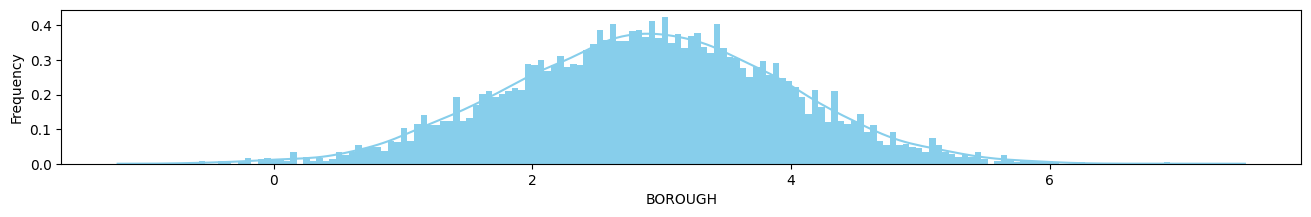

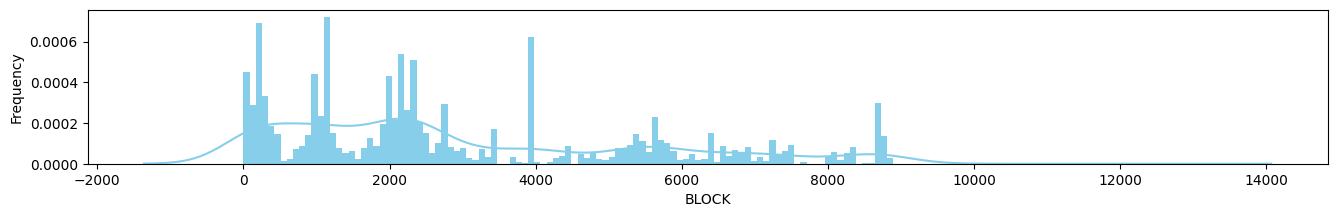

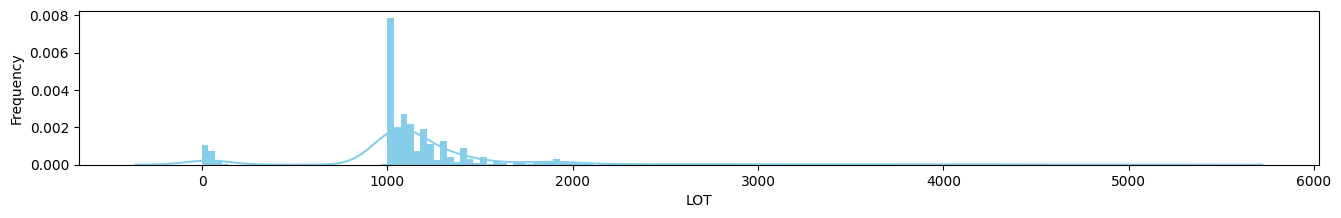

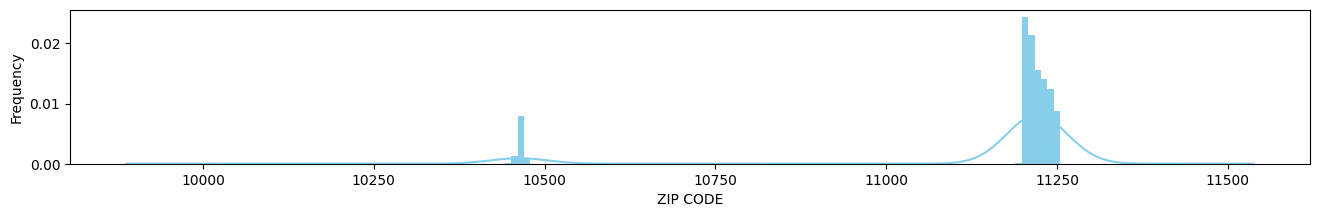

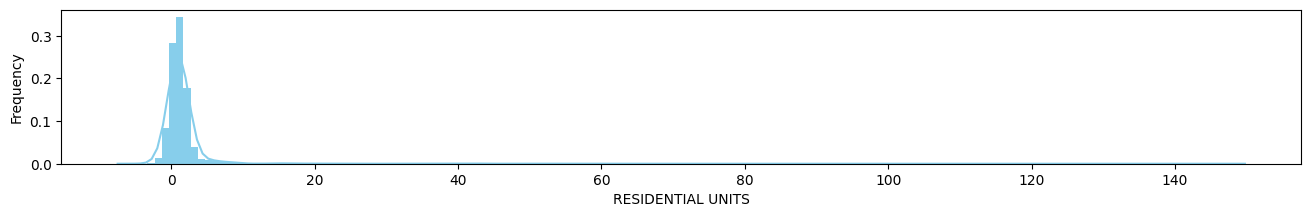

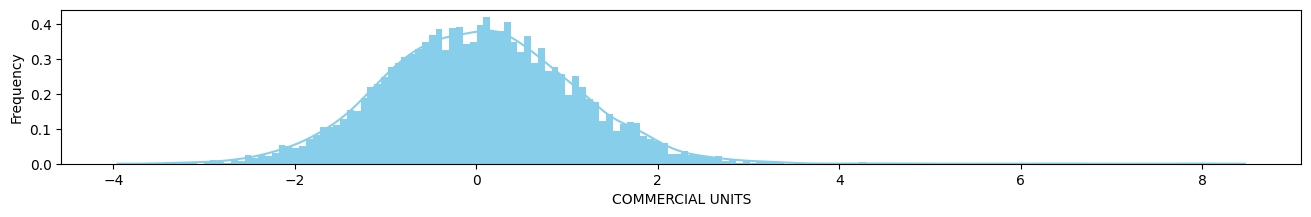

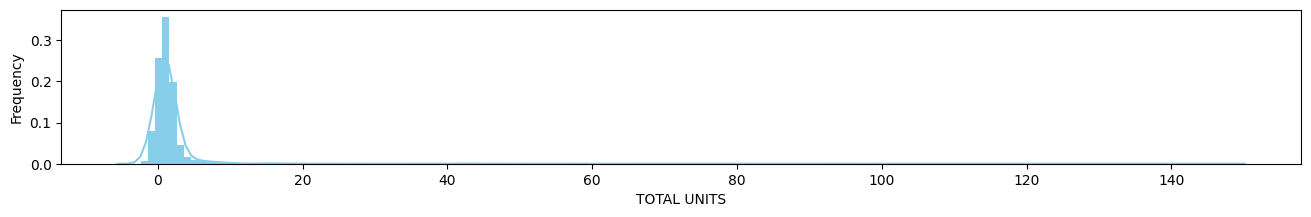

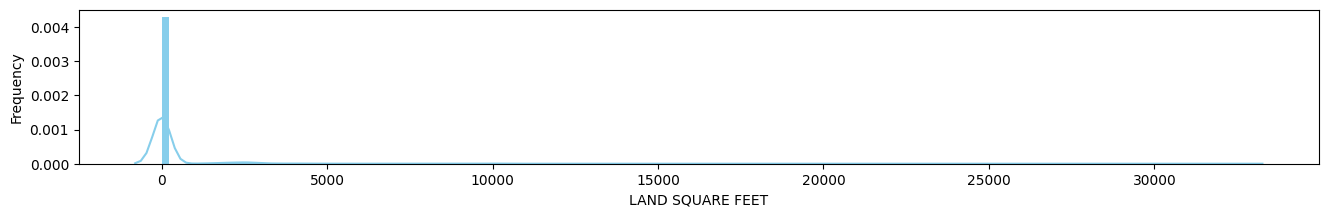

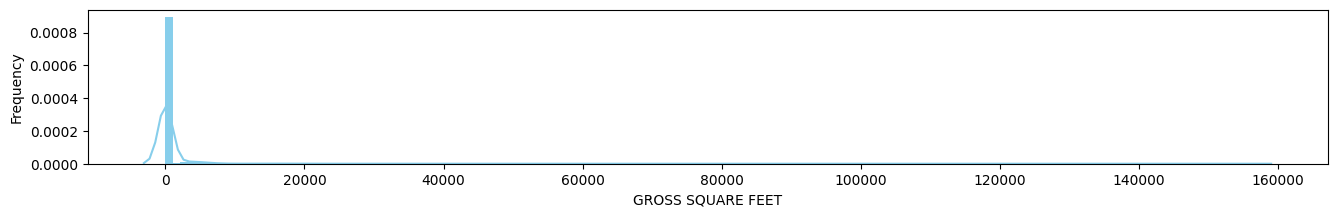

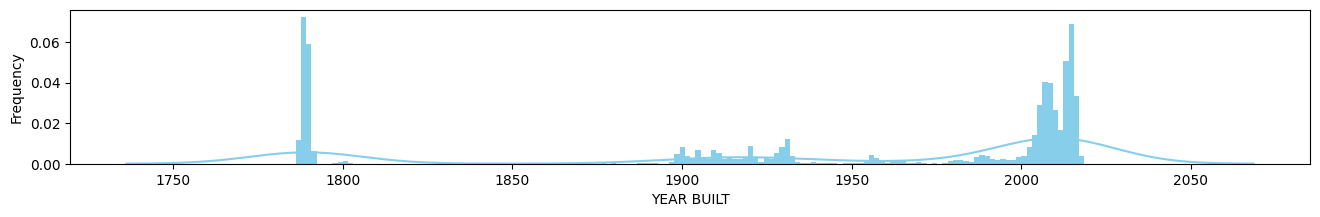

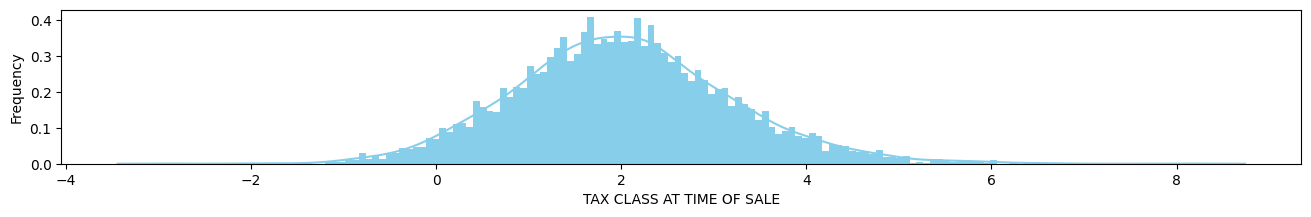

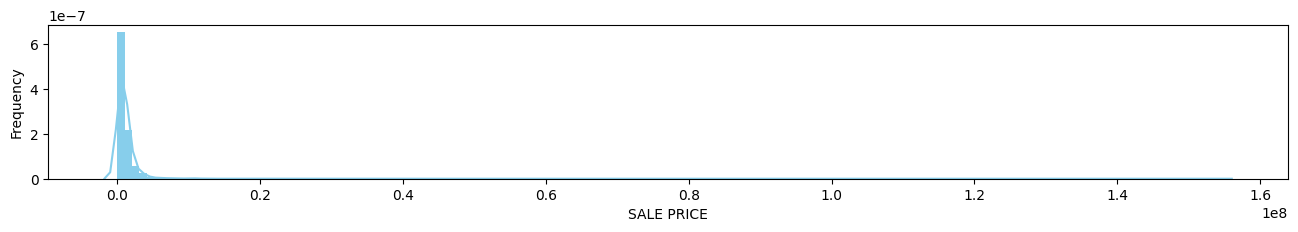

In [612]:
for i in int_cols: #Lakukan perulangan pada kolom bertipe angka
  fig = plt.subplots(figsize=(16, 2)) #Set figure
  data_normal = norm.rvs(df_int[i]) #Rubah ke data norm
  ax= sns.distplot(data_normal, bins=150, kde=True, color='skyblue', hist_kws={"linewidth": 1,'alpha':1})
  ax.set(xlabel=i, ylabel='Frequency') #set ax

# Confidence Intervals

In [613]:
# Mengambil data Year Built dan Sale Price
df_interval = df[['YEAR BUILT', 'SALE PRICE']].copy()


Alasan di balik pengambilan data Year Built (tahun pembangunan) dan Sale Price (harga jual) adalah karena informasi tersebut sering menjadi perhatian utama bagi orang-orang yang melakukan estimasi terkait properti tersebut. Tahun pembangunan memberikan gambaran tentang seberapa tua atau baru suatu properti, sementara harga jual memberikan petunjuk mengenai nilai ekonomi yang terkait dengan properti tersebut. Oleh karena itu, data Year Built dan Sale Price dianggap penting dalam analisis dan estimasi properti, serta menjadi faktor utama dalam memperkirakan nilai dan karakteristik properti yang terkait.

In [614]:
# Tampilkan data
df_interval.head()

,YEAR BUILT,SALE PRICE
10520,2014,23296741.0
10694,1880,8146000.0
17090,1929,41000000.0
18746,2008,310000.0
18747,2008,342500.0


In [615]:
for i in df_interval.columns: #Lakukan perulangan nama kolom
  df_mean = np.mean(df_interval[i]) # Ambil nilai mean
  df_median = np.mean(df_interval[i]) # Ambil nilai median
  df_std = np.std(df_interval[i]) # Ambil nilai standar deviasi
  confidence = 0.95 # Menentukan confedence
  error = stats.sem(df_interval[i])  # Menentukan batas error

  n = df_interval[i].shape[0] # Menghitung panjang data
  confidence_interval = t.interval(confidence, df=n-1, loc=df_median, scale=error) # Melakukan penghitungan cofidence interval
  print("Confidence Interval ", i , ": ", confidence_interval) # Menampilkan hasilnya

Confidence Interval  YEAR BUILT :  (1937.49456614232, 1942.6161762882068)
Confidence Interval  SALE PRICE :  (1110133.4564139727, 1294158.4983765706)


Setelah melakukan pengecekan terhadap interval tahun pembangunan (year build) dan harga jual (sale price), ditemukan beberapa asumsi yang dilakukan oleh orang-orang. Menurut asumsi tersebut, rumah-rumah yang dijual diperkirakan dibangun antara rentang tahun 1937 hingga 1942. Selain itu, mereka juga mengasumsikan bahwa harga rumah yang ditawarkan berada dalam kisaran sekitar 1.110.133 hingga 1.294.158. Perlu dicatat bahwa ini hanyalah asumsi yang didasarkan pada informasi interval yang diperoleh dan belum tentu mencerminkan nilai sebenarnya dari tahun pembangunan dan harga jual rumah tersebut.

# Hypothesis Testing

Menarik hipoteas, Apakah harga rumah pada tahun 2000 ke atas lebih mahal dari pada tahun 2000 kebawah ?

In [617]:
df_year_lebih_2000 = df[df['YEAR BUILT'] > 2000].copy() #data dengan year built lebih dari tahun 2000
df_year_kurang_2000 = df[df['YEAR BUILT'] < 2000].copy() #data dengan year built kurang dari tahun 2000

In [618]:
len_2001 = df_year_lebih_2000.shape[0] # Jumlah data dengan rumah year built > 2000
mean_2001 = df_year_lebih_2000['SALE PRICE'].mean() # mean dengan data rumah year built > 2000
std_2001 = df_year_lebih_2000['SALE PRICE'].std() # std dengan data rumah year built > 2000

(len_2001, mean_2001, std_2001)

(2500, 1226850.384, 3842925.8511700123)

In [619]:
len_1999 = df_year_kurang_2000.shape[0] # Jumlah data dengan rumah year built < 2000
mean_1999 = df_year_kurang_2000['SALE PRICE'].mean() # mean dengan data rumah year built < 2000
std_1999 = df_year_kurang_2000['SALE PRICE'].std() # std dengan data rumah year built < 2000

(len_1999, mean_1999, std_1999)

(2313, 1177664.178555988, 2486667.0009958525)

In [622]:
sm.stats.ztest(df_year_lebih_2000['SALE PRICE'], df_year_kurang_2000['SALE PRICE'] ,alternative='larger')

(0.5225990909558623, 0.30062663663416767)

Hasil analisis dengan menggunakan uji z-test menunjukkan bahwa nilai p-value (0.522) yang diperoleh relatif kecil, sedangkan nilai signifikansi yang ditetapkan (0.300) untuk pengujian tersebut. Berdasarkan temuan ini, kita tidak memiliki cukup bukti statistik yang kuat untuk menolak hipotesis nol yang menyatakan bahwa persentase orang-orang yang percaya bahwa harga rumah pada tahun pembuatan kurang dari 2000 lebih mahal daripada rumah yang dibangun setelah tahun 2000 mengalami penurunan yang signifikan dari tahun ke tahun. Dengan demikian, dari analisis yang dilakukan, tidak ada dasar yang kuat untuk mengatakan bahwa terdapat perubahan yang signifikan dalam keyakinan tersebut selama periode waktu yang diteliti.